# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Tutora:** Me. Isadora Garcia Ferrão
📧 isadoraferrao@usp.be
🌐 [linkedin](https://www.linkedin.com/in/isadora-ferrao/)

# Case: Algoritmo k-NN com o dataset Wine quality
**Objetivo:** Análise de desempenho do K-NN na classificação de vinhos usando métricas de distância.

Dataset disponível em: https://archive.ics.uci.edu/dataset/109/wine
Dataset disponível em: https://archive.ics.uci.edu/dataset/109/wine

* Importação das biblitecas e carregamento do dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

In [ ]:
# Exibir as primeiras linhas do dataset para ter uma visão geral dos dados
print("Primeiras linhas do dataset:")
print(data.head())

In [3]:
# Exibir informações sobre o dataset, como tipos de dados e contagem de valores não nulos
print("\nInformações sobre o dataset:")
print(data.info())


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
# Exibir estatísticas descritivas do dataset, como média, desvio padrão e percentis
print("\nEstatísticas descritivas do dataset:")
print(data.describe())


Estatísticas descritivas do dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       

In [5]:
# Separar as features (características dos vinhos) e o target (qualidade do vinho)
X = data.drop('quality', axis=1)  # Features: todas as colunas exceto 'quality'
y = data['quality']  # Target: coluna 'quality'

In [6]:
# Normalização
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

* Divisão do dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

* Aplicação do K-NN


Acurácia do modelo: 0.5708

Análise adicional:
Matriz de Confusão:
[[  0   0   0   1   0   0]
 [  0   1   8   8   0   0]
 [  1   1 137  52   4   0]
 [  0   1  68 112  19   0]
 [  0   0   9  28  24   0]
 [  0   0   1   2   3   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.06      0.10        17
           5       0.61      0.70      0.66       195
           6       0.55      0.56      0.56       200
           7       0.48      0.39      0.43        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.33      0.29      0.29       480
weighted avg       0.55      0.57      0.56       480



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

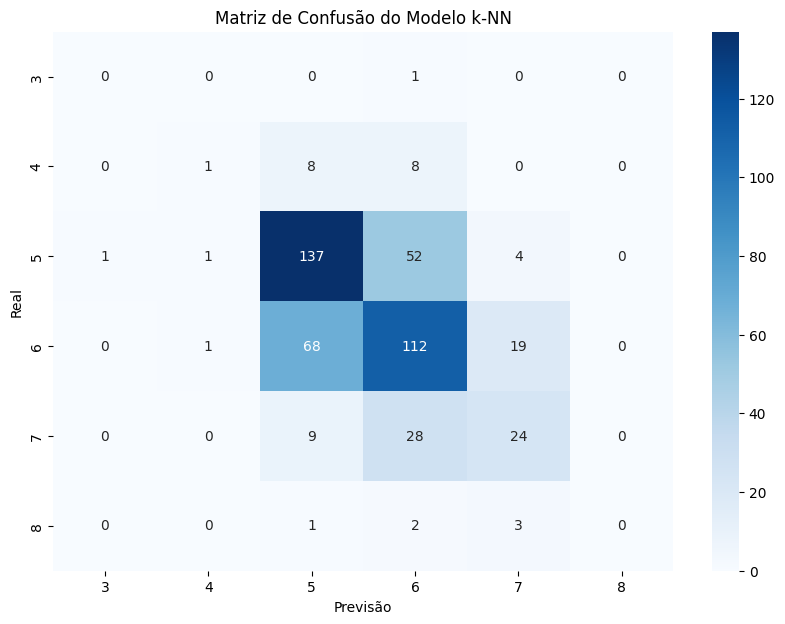

In [8]:
# Inicializar o classificador k-NN com 5 vizinhos e a métrica de distância euclidiana
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(class_report)

plt.figure(figsize=(10, 7))  # Definir o tamanho da figura
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Previsão')  # Rótulo para o eixo x
plt.ylabel('Real')  # Rótulo para o eixo y
plt.title('Matriz de Confusão do Modelo k-NN')  # Título do gráfico
plt.show()  # Exibir o gráfico